<a href="https://colab.research.google.com/github/Ahmetyldrr/PyTorch-Ultimate/blob/main/MultiClass_Classification_My_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary - Multi-Class ve Multi-Label


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Kavramsal Farklar**



**Multi-Class**

- **Tanım**: Elimizde \( N \) adet sınıf (örneğin kedi, köpek, kuş gibi) vardır ve modelin her örnek (resim, metin vs.) için **tek bir** sınıfı seçmesi gerekir.  
- **Örnek**: “Bu resimde kedi mi, köpek mi yoksa kuş mu var?” sorusuna yanıt olarak model çıktı olarak **tek etiket** döndürür (örneğin `"kedi"`).



**Multi-Label**

- **Tanım**: Bir örnek aynı anda birden çok sınıfa ait olabilir.  
- **Örnek**: “Bu resimde hem kedi hem de kuş var” gibi. Dolayısıyla aynı veri örneği için birden çok etiket geçerli olabilir (örneğin `["kedi", "kuş"]`).

---



2. Çıkış Katmanı ve Kayıp Fonksiyonları






Multi-Class (Tek Etiketli Sınıflandırma)
1. **Çıkış Katmanı**  
   - Son katmanda, sınıf sayısı kadar nöron bulunur (ör. 3 sınıf için 3 nöron).  
   - Genelde `Softmax` aktivasyon (ya da PyTorch’ta `CrossEntropyLoss` kullanacaksak ham logit çıkışı verip kaybın kendi içinde `log_softmax` uygulamasına bırakmak).
2. **Kayıp Fonksiyonu**  
   - PyTorch’ta sıklıkla `nn.CrossEntropyLoss` kullanılır.
3. **Çıktı Boyutu**  
   - Model çıktı vektörünün boyutu: `[batch_size, num_classes]`.  
   - Örneğin batch_size = 8, num_classes = 3 için `[8, 3]` şeklinde olur.
4. **Label Formatı**  
   - Her örnek için tek bir tamsayı etiket (`class_idx`)  
   - Label tensörünün boyutu: `[batch_size]` (örneğin `[8]`).

#Confussion Matrix

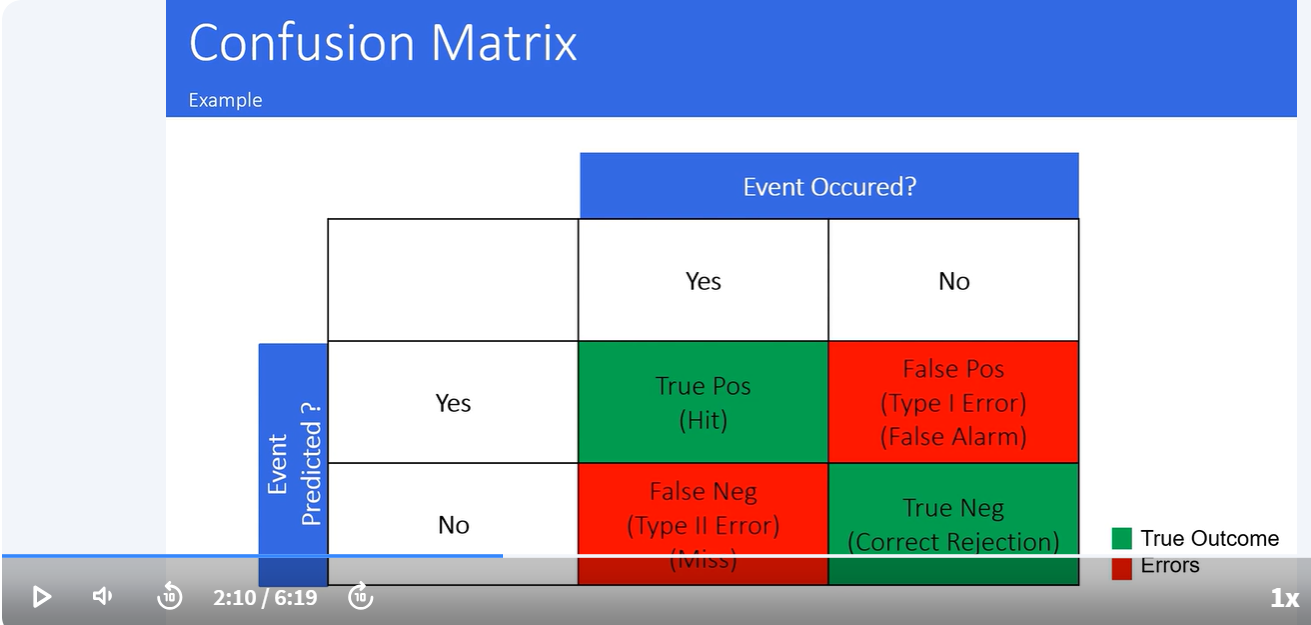

**Confussion Matrix Nedir.**

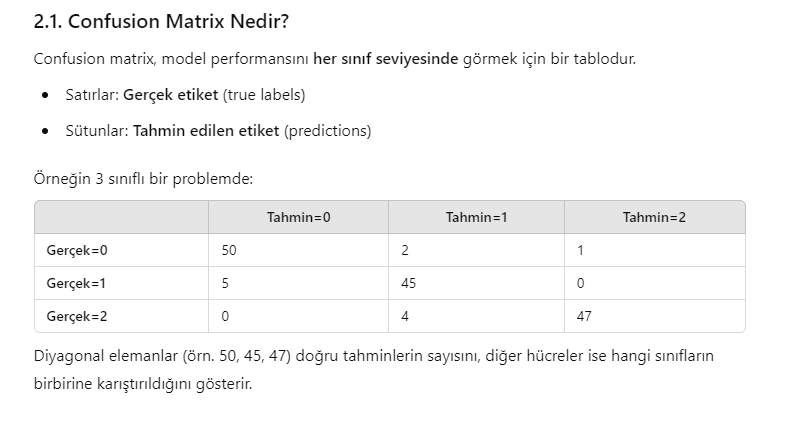

**Accuracy , Precision ve Recall Hesaplanması**

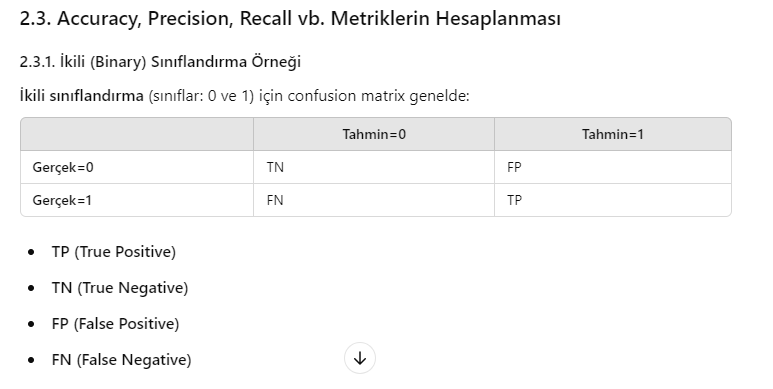

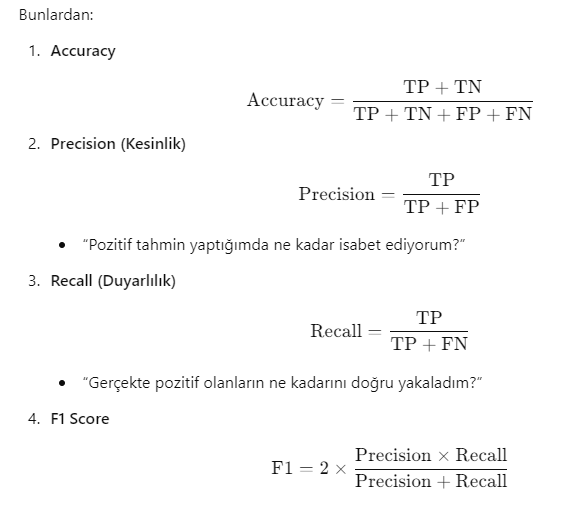

**Önemli Not**

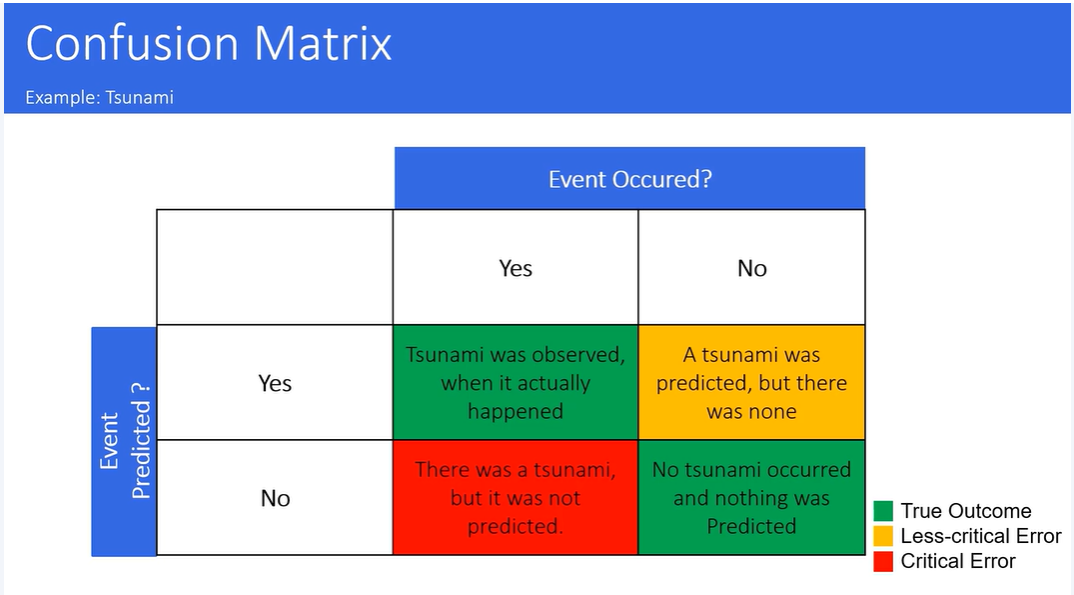

# Roc Curve

**Neden Kullanılır, Ne İfade Eder?**

**Model Karşılaştırma**

 ROC eğrisi, aynı veri seti üzerinde eğitilmiş birden fazla modeli (örneğin Lojistik Regresyon, Rastgele Orman (Random Forest), SVM vb.) farklı eşik değerleri üzerinden karşılaştırma imkânı sağlar.

Eğrisi sol üst köşeye daha yakın olan model, genelde daha iyi performans gösterir (daha yüksek TPR, daha düşük FPR).

**Eşik Seçimi**

 ROC eğrisi, “hangi eşik değerinde nasıl bir TPR ve FPR elde ederiz?” sorusuna görsel olarak cevap sunar.

 Uygulama senaryolarında, yanlış negatif veya yanlış pozitif (FN ya da FP) maliyetinin daha önemli olup olmadığına göre uygun eşiği seçmek kritiktir.

**AUC (Area Under Curve)**

 ROC eğrisinin altında kalan alan, AUC (Area Under Curve) olarak adlandırılır.
 AUC skoru 1’e ne kadar yakınsa, model o kadar iyi demektir.

 Ancak transkriptte de belirtildiği gibi, AUC bazı durumlarda yanıltıcı olabilir; özellikle FN ve FP maliyetleri aynı değilse (örneğin düşman denizaltısı senaryosunda FN çok daha maliyetliyse), yalnızca AUC’ye bakarak karar vermek hata olabilir.

Modelin farklı eşik değerlerinde nasıl davrandığını görselleştirmek için kullanılır. Genel olarak binary sınıflandırmalar için kullanılır.

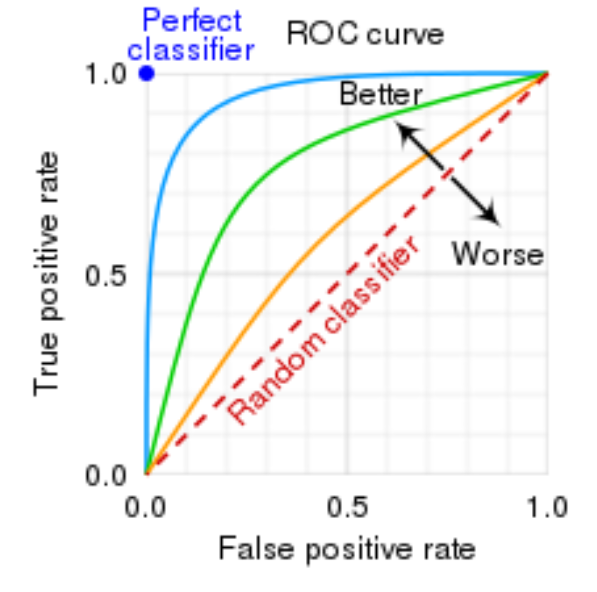

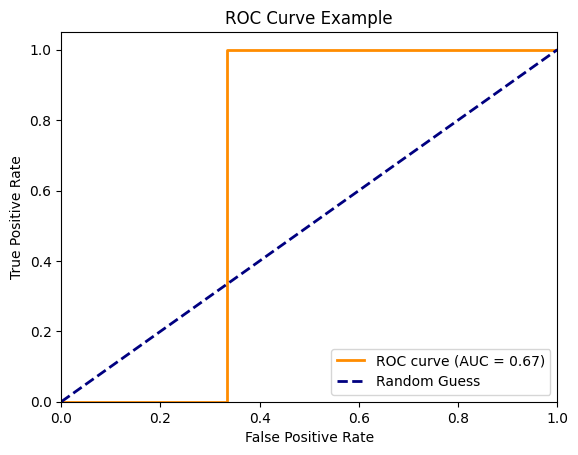

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Örnek gerçek etiketler (0 veya 1)
y_true = np.array([0, 0, 1, 1, 0, 1])
# Modelin verdiği olasılıklar
y_scores = np.array([0.2, 0.8, 0.4, 0.5, 0.1, 0.7])

# FPR, TPR ve Eşik değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# AUC değerini hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Example')
plt.legend(loc="lower right")
plt.show()


# Torch Multi Class Projesi

## 1. Genel Bilgiler
1. **Train-Test (veya Train-Validation-Test) Split**  
   - Veri setini eğitim, doğrulama, test olarak bölmek.

2. **Dönüşümler (Transforms, Data Augmentation)** *(İsteğe Bağlı)*  
   - Resim verilerinde `transforms.Compose([...])` gibi augmentasyon adımları.  
   - Metin verilerinde tokenizasyon, temizleme vb.

3. **Veri Tipi Dönüşümleri**  
   - `float32`, `long` (etiketler için) vb. gibi PyTorch’un beklediği formatlarda veriyi ayarlamak.

---

## 2. Dataset Sınıfı
- **PyTorch Dataset** yapısını kullanarak verileri nasıl okuyacağınızı tanımlamak.  
- `__getitem__` ve `__len__` metodlarını override etmek.

---

## 3. DataLoader Oluşturma
- Dataset nesnesini PyTorch’un `DataLoader`’ına vererek mini-batch’ler halinde veri okumayı sağlamak.  
- `batch_size`, `shuffle` vs. gibi parametreleri ayarlamak.

---

## 4. Model Mimarisi Tanımlama (nn.Module)
- Kendi **model sınıfınızı** (`class MyModel(nn.Module):`) oluşturmak.  
- `__init__` ve `forward` metodlarını tanımlamak.

---

## 5. Hiperparametreler
- **Öğrenme hızı** (learning rate), `batch_size`, **epoch sayısı**, vb.  
- Momentum, ağırlık çürümesi (weight decay), vb. gibi ek hiperparametreler de.

---

## 6. Model Örneği Oluşturma
- `model = MyModel(...)` şeklinde nesne oluşturmak.
- Mümkünse `model.to(device)` (CPU/GPU) atamasını yapmak.

---

## 7. Kayıp Fonksiyonu (Loss)
- **Multi-Class** ise çoğunlukla `nn.CrossEntropyLoss()` kullanmak.  
- Etiketlerin tipini (`long`) ve model çıkış boyutlarını kontrol etmek.

---

## 8. Optimizasyon (Optimizer)
- `torch.optim` (SGD, Adam, vb.) ile model parametrelerinin güncellenmesi.  
- `optimizer = torch.optim.Adam(model.parameters(), lr=...)`

---

## 9. Eğitim Döngüsü (Training Loop)
1. **Epoch döngüsü** (`for epoch in range(num_epochs):`)
2. **Batches döngüsü** (DataLoader üzerinden)  
3. **Forward** (girdi → model → çıkış), **Loss** hesaplama  
4. **Backward** (`loss.backward()`)  
5. **optimizer.step()**, **optimizer.zero_grad()**

---

## 10. Kayıpların Takibi ve Görselleştirme
- Her epoch sonunda `train_loss`, belki `val_loss` ölçmek.  
- Eğitim sürecini kaybetmek (early stopping vs.) istemiyorsanız periyodik kaydetmek de isteyebilirsiniz.

---

## 11. Modeli Test Etme
1. **Eval moduna** alma (`model.eval()`).  
2. **Test DataLoader** üzerinden geçip tahminler almak.  
3. Hesaplanan tahminlerle gerçeği karşılaştırıp `accuracy`, `precision`, `recall` vb. ölçmek.

---

## 12. Ek Değerlendirme / Kaydetme
- **Confusion Matrix** (çok-sınıflı projelerde faydalı olur).  
- **Model Kaydı** (`torch.save(model.state_dict(), "model.pth")`).
- **TensorBoard** veya başka bir araçla görselleştirme.

---

# Sonuç

- Saydığınız adımlar (train-test split, dataset, dataloader, model, loss, optimizer, training, test, accuracy vb.) çoğu PyTorch projesinin **belkemiğini** oluşturur.  
- İhtiyaca göre **daha fazla adım** veya **daha az adım** da olabilir (veri ön işleme, hiperparametre ayarlama (tuning), veri artırma, vb.).  
- Kendi projeniz için “iskelesi” (template) olarak bu sıralamayı kullanıp, proje gereksinimlerine göre üzerinde ufak değişiklikler yapabilirsiniz.


## packages

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

## Data İmport

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## convert to float32

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


## dataset

In [ ]:
class IrisData(Dataset):
    def __init__(self, X_train, y_train) -> None:
        super().__init__()
        self.X = torch.from_numpy(X_train)
        self.y = torch.from_numpy(y_train)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

## dataloader

In [ ]:
iris_data = IrisData(X_train=X_train, y_train=y_train)
train_loader = DataLoader(dataset=iris_data, batch_size=32)

## check dims

In [ ]:
print(f"X Shape: {iris_data.X.shape}, y shape: {iris_data.y.shape}")

X Shape: torch.Size([120, 4]), y shape: torch.Size([120])


## define class

In [ ]:
class MultiClassNet(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN_FEATURES):
        super().__init__()
        self.lin1 = nn.Linear(NUM_FEATURES, HIDDEN_FEATURES)
        self.lin2 = nn.Linear(HIDDEN_FEATURES, NUM_CLASSES)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return self.log_softmax(x)

## hyper parameters

In [ ]:
NUM_FEATURES = iris_data.X.shape[1]
HIDDEN = 6
NUM_CLASSES = len(iris_data.y.unique())

## create model instance

In [ ]:
model = MultiClassNet(NUM_FEATURES=NUM_FEATURES, NUM_CLASSES=NUM_CLASSES, HIDDEN_FEATURES=HIDDEN)

## loss function

In [ ]:
criterion = nn.CrossEntropyLoss()

## optimizer

In [ ]:
lr = 0.1
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

## training

In [ ]:
NUM_EPOCHS = 100
losses = []
for epoch in range(NUM_EPOCHS):
    for x, y in train_loader:

        # initialize gradients
        optimizer.zero_grad()

        # forward pass
        y_hat_log = model(x)

        # calculate losses
        loss = criterion(y_hat_log, y)

        # calculate gradients

        loss.backward()
        # update parameters
        optimizer.step()

    losses.append(float(loss.data.detach().numpy()))

## show losses over epochs

<Axes: >

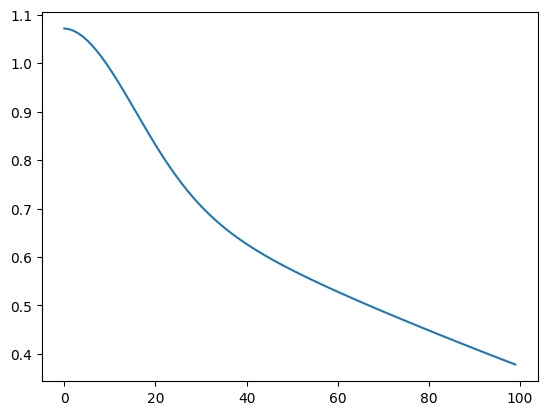

In [ ]:
sns.lineplot(x= range(len(losses)), y = losses)

## test the model

In [ ]:
X_test_torch = torch.from_numpy(X_test)
with torch.no_grad():
    y_test_hat_softmax = model(X_test_torch)
    y_test_hat = torch.max(y_test_hat_softmax.data, 1)

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test_hat.indices.numpy()

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Accuracy

In [ ]:
accuracy_score(y_test, y_test_hat.indices.numpy())

0.9666666666666667

In [ ]:
from collections import Counter
most_common_cnt = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier: {most_common_cnt / len(y_test) * 100} %")

Naive Classifier: 36.666666666666664 %


## save model state dict

In [ ]:
torch.save(model.state_dict(), 'model_iris.pt')

In [ ]:
model.state_dict()

OrderedDict([('lin1.weight',
              tensor([[ 0.0862,  1.1064, -1.1510, -0.6801],
                      [ 0.2564,  0.1141, -0.4449, -0.5127],
                      [ 0.8078,  0.7871, -1.4253, -1.0021],
                      [-0.1099, -0.6417,  0.8016, -0.1148],
                      [-0.2559,  0.0031, -0.1988, -0.4283],
                      [-0.0563, -1.1206,  1.1675,  0.3505]])),
             ('lin1.bias',
              tensor([-0.3534,  0.0998,  0.5585,  0.2574,  0.4818,  0.2754])),
             ('lin2.weight',
              tensor([[ 1.6217,  0.6207,  1.7819, -1.0876,  0.2595, -1.7507],
                      [-0.8165,  0.3831,  0.6618, -0.1337, -0.1569,  0.7787],
                      [-0.8110, -0.4567, -1.8841,  0.6938, -0.0888,  1.0584]])),
             ('lin2.bias', tensor([-0.3258, -0.0163,  0.3435]))])

In [ ]:
model.eval()

# Iris veri seti genelde 4 girdi özelliği (sepal length, sepal width, petal length, petal width) içerir.
# Örnek bir girdi (tek satır):
sample_input = torch.tensor([[6. , 2.2, 4. , 1. ]], dtype=torch.float32)

# Sınıf isimlerini sırasıyla modelin çıktısına uyacak şekilde hazırlayalım
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

# Model çıktısını alalım
with torch.no_grad():
    output = model(sample_input)       # Şekil: [1, 3]
    predicted_class = torch.argmax(output, dim=1).item()  # En yüksek skoru veren indeks

# Sayısal sonuç
print("Model çıkışı (logits):", output)
print("Tahmin edilen sınıf indeksi:", predicted_class)

# Metinsel sonuç
predicted_label = class_names[predicted_class]
print("Tahmin edilen sınıf adı:", predicted_label)

Model çıkışı (logits): tensor([[-2.9126, -0.4902, -1.0992]])
Tahmin edilen sınıf indeksi: 1
Tahmin edilen sınıf adı: Iris-versicolor


In [ ]:
import torch

# Örnek logits değeri (model çıkışınız):
logits = torch.tensor(output)

# Softmax uygulayarak sınıf olasılıklarını hesapla:
probs = torch.softmax(logits, dim=1)

print("Logits:", logits)
print("Olasılıklar (Probs):", probs)


Logits: tensor([[-2.9126, -0.4902, -1.0992]])
Olasılıklar (Probs): tensor([[0.0543, 0.6125, 0.3331]])


<ipython-input-63-4596e08733e2>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logits = torch.tensor(output)


In [ ]:
predicted_class = torch.argmax(probs, dim=1).item()  # En yüksek olasılığın indeksini alır
predicted_probability = probs[0, predicted_class].item()  # O sınıfın olasılığı

print("Tahmin edilen sınıf indeksi:", predicted_class)
print(f"Tahmin edilen sınıfın olasılığı: %{predicted_probability * 100:.2f}")

Tahmin edilen sınıf indeksi: 1
Tahmin edilen sınıfın olasılığı: %61.25


# Quality New Project Torch - Multi Class Predict

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## İmport Data

In [ ]:
# https://www.kaggle.com/datasets/taweilo/wine-quality-dataset-balanced-classification/data

In [ ]:
# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# Kontrol
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 20960 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         20960 non-null  float64
 1   volatile_acidity      20960 non-null  float64
 2   citric_acid           20960 non-null  float64
 3   residual_sugar        20960 non-null  float64
 4   chlorides             20960 non-null  float64
 5   free_sulfur_dioxide   20960 non-null  float64
 6   total_sulfur_dioxide  20960 non-null  float64
 7   density               20960 non-null  float64
 8   pH                    20960 non-null  float64
 9   sulphates             20960 non-null  float64
 10  alcohol               20960 non-null  float64
 11  quality               20960 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 2.1 MB
None
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66 

## Load Data

In [ ]:
# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)
y = y - y.min()
y

array([0, 0, 0, ..., 6, 6, 6])

## train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kontrol
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (16768, 11), X_test shape: (4192, 11)
y_train shape: (16768,), y_test shape: (4192,)


## Wine Dataset

In [ ]:
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



## Dataloader

In [ ]:
class MultiClassNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiClassNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)  # Ekstra bir gizli katman
        self.layer3 = nn.Linear(hidden_dim // 2, output_dim)  # Çıkış katmanı
        self.dropout = nn.Dropout(0.3)  # %30 dropout
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)  # Batch normalization
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)  # İkinci batch normalization

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))  # İlk katman + batch norm
        x = self.dropout(x)  # Dropout
        x = torch.relu(self.batch_norm2(self.layer2(x)))  # İkinci katman + batch norm
        x = self.layer3(x)  # Çıkış logitsleri
        return x


# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 32
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = MultiClassNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()  # Modeli float32 formatında çalıştırıyoruz


In [ ]:
criterion = nn.CrossEntropyLoss()  # Çoklu sınıflandırma kaybı
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam optimizörü


In [ ]:
NUM_EPOCHS = 100
losses = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")



Epoch [1/100], Loss: 1.6283
Epoch [2/100], Loss: 1.6052
Epoch [3/100], Loss: 1.6012
Epoch [4/100], Loss: 1.5986
Epoch [5/100], Loss: 1.5997
Epoch [6/100], Loss: 1.5963
Epoch [7/100], Loss: 1.5955
Epoch [8/100], Loss: 1.5960
Epoch [9/100], Loss: 1.5933
Epoch [10/100], Loss: 1.5939
Epoch [11/100], Loss: 1.5923
Epoch [12/100], Loss: 1.5901
Epoch [13/100], Loss: 1.5888
Epoch [14/100], Loss: 1.5912
Epoch [15/100], Loss: 1.5872
Epoch [16/100], Loss: 1.5911
Epoch [17/100], Loss: 1.5912
Epoch [18/100], Loss: 1.5893
Epoch [19/100], Loss: 1.5876
Epoch [20/100], Loss: 1.5890
Epoch [21/100], Loss: 1.5887
Epoch [22/100], Loss: 1.5886
Epoch [23/100], Loss: 1.5901
Epoch [24/100], Loss: 1.5881
Epoch [25/100], Loss: 1.5855
Epoch [26/100], Loss: 1.5879
Epoch [27/100], Loss: 1.5877
Epoch [28/100], Loss: 1.5856
Epoch [29/100], Loss: 1.5868
Epoch [30/100], Loss: 1.5868
Epoch [31/100], Loss: 1.5858
Epoch [32/100], Loss: 1.5857
Epoch [33/100], Loss: 1.5867
Epoch [34/100], Loss: 1.5855
Epoch [35/100], Loss: 1

<Axes: >

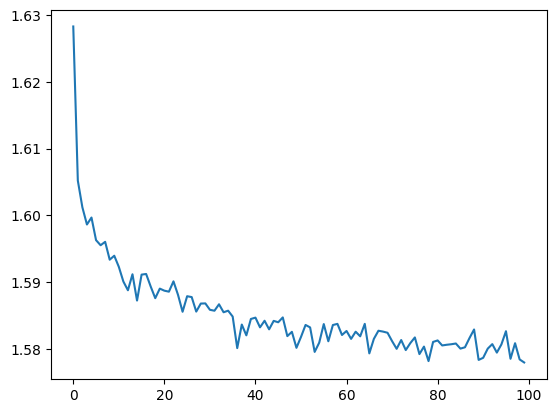

In [ ]:
sns.lineplot(x= range(len(losses)), y = losses)

In [ ]:
model.eval()  # Değerlendirme moduna geçiyoruz
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 31.13%


## Full Model Wine

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)
y = y - y.min()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class MultiClassNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiClassNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)  # Ekstra bir gizli katman
        self.layer3 = nn.Linear(hidden_dim // 2, output_dim)  # Çıkış katmanı
        self.dropout = nn.Dropout(0.3)  # %30 dropout
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)  # Batch normalization
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)  # İkinci batch normalization

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))  # İlk katman + batch norm
        x = self.dropout(x)  # Dropout
        x = torch.relu(self.batch_norm2(self.layer2(x)))  # İkinci katman + batch norm
        x = self.layer3(x)  # Çıkış logitsleri
        return x



# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 32
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = MultiClassNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()  # Modeli float32 formatında çalıştırıyoruz


criterion = nn.CrossEntropyLoss()  # Çoklu sınıflandırma kaybı
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam optimizörü


NUM_EPOCHS = 100
losses = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")


    model.eval()  # Değerlendirme moduna geçiyoruz
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

## Model Test 1

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data.sampler import WeightedRandomSampler

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# Eğitim ve test verisine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Sınıf ağırlıklarının hesaplanması
class_counts = np.bincount(y_train)
class_weights = 1.0 / class_counts
sample_weights = class_weights[y_train]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Tanımı
class DeeperNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeeperNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer4 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.batch_norm2(self.layer3(x)))
        x = self.layer4(x)
        return x

# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 128
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = DeeperNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()

# Kayıp Fonksiyonu ve Optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Eğitim Döngüsü
NUM_EPOCHS = 50
losses = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Öğrenme oranı güncellemesi
    scheduler.step()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")

# Test ve Doğruluk Kontrolü
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/50], Loss: 1.6250
Epoch [2/50], Loss: 1.5865
Epoch [3/50], Loss: 1.5831
Epoch [4/50], Loss: 1.5872
Epoch [5/50], Loss: 1.5854
Epoch [6/50], Loss: 1.5786
Epoch [7/50], Loss: 1.5706
Epoch [8/50], Loss: 1.5670
Epoch [9/50], Loss: 1.5649
Epoch [10/50], Loss: 1.5627
Epoch [11/50], Loss: 1.5638
Epoch [12/50], Loss: 1.5624
Epoch [13/50], Loss: 1.5576
Epoch [14/50], Loss: 1.5472
Epoch [15/50], Loss: 1.5535
Epoch [16/50], Loss: 1.5482
Epoch [17/50], Loss: 1.5405
Epoch [18/50], Loss: 1.5384
Epoch [19/50], Loss: 1.5439
Epoch [20/50], Loss: 1.5355
Epoch [21/50], Loss: 1.5351
Epoch [22/50], Loss: 1.5297
Epoch [23/50], Loss: 1.5303
Epoch [24/50], Loss: 1.5355
Epoch [25/50], Loss: 1.5274
Epoch [26/50], Loss: 1.5257
Epoch [27/50], Loss: 1.5259
Epoch [28/50], Loss: 1.5313
Epoch [29/50], Loss: 1.5190
Epoch [30/50], Loss: 1.5224
Epoch [31/50], Loss: 1.5274
Epoch [32/50], Loss: 1.5056
Epoch [33/50], Loss: 1.5137
Epoch [34/50], Loss: 1.5117
Epoch [35/50], Loss: 1.5117
Epoch [36/50], Loss: 1.5192
E

## Test Model 2

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data.sampler import WeightedRandomSampler

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# Eğitim ve test verisine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Sınıf ağırlıklarının hesaplanması
class_counts = np.bincount(y_train)
class_weights = 1.0 / class_counts
sample_weights = class_weights[y_train]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Tanımı
class DeeperNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeeperNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer4 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.batch_norm2(self.layer3(x)))
        x = self.layer4(x)
        return x

# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 256  # Daha fazla nöron kullanıyoruz
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = DeeperNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()

# Kayıp Fonksiyonu ve Optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005)  # Daha düşük öğrenme oranı ve AdamW optimizörü
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # Cosine learning rate schedule

# Eğitim Döngüsü
NUM_EPOCHS = 500
losses = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Öğrenme oranı güncellemesi
    scheduler.step()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")

# Test ve Doğruluk Kontrolü
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/500], Loss: 1.6145
Epoch [2/500], Loss: 1.5903
Epoch [3/500], Loss: 1.5809
Epoch [4/500], Loss: 1.5843
Epoch [5/500], Loss: 1.5830
Epoch [6/500], Loss: 1.5696
Epoch [7/500], Loss: 1.5652
Epoch [8/500], Loss: 1.5591
Epoch [9/500], Loss: 1.5642
Epoch [10/500], Loss: 1.5581
Epoch [11/500], Loss: 1.5567
Epoch [12/500], Loss: 1.5574
Epoch [13/500], Loss: 1.5548
Epoch [14/500], Loss: 1.5577
Epoch [15/500], Loss: 1.5589
Epoch [16/500], Loss: 1.5495
Epoch [17/500], Loss: 1.5574
Epoch [18/500], Loss: 1.5537
Epoch [19/500], Loss: 1.5465
Epoch [20/500], Loss: 1.5573
Epoch [21/500], Loss: 1.5479
Epoch [22/500], Loss: 1.5478
Epoch [23/500], Loss: 1.5307
Epoch [24/500], Loss: 1.5325
Epoch [25/500], Loss: 1.5122
Epoch [26/500], Loss: 1.5364
Epoch [27/500], Loss: 1.5125
Epoch [28/500], Loss: 1.5092
Epoch [29/500], Loss: 1.4986
Epoch [30/500], Loss: 1.5020
Epoch [31/500], Loss: 1.4945
Epoch [32/500], Loss: 1.4887
Epoch [33/500], Loss: 1.4950
Epoch [34/500], Loss: 1.4884
Epoch [35/500], Loss: 1

## Erken Durdurma Model

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data.sampler import WeightedRandomSampler

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# Eğitim ve test verisine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Sınıf ağırlıklarının hesaplanması
class_counts = np.bincount(y_train)
class_weights = 1.0 / class_counts
sample_weights = class_weights[y_train]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Tanımı
class DeeperNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeeperNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer4 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.batch_norm2(self.layer3(x)))
        x = self.layer4(x)
        return x

# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 256  # Daha fazla nöron kullanıyoruz
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = DeeperNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()

# Kayıp Fonksiyonu ve Optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005)  # Daha düşük öğrenme oranı ve AdamW optimizörü
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # Cosine learning rate schedule

# Erken Durdurma Sınıfı
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Eğitim Döngüsü
NUM_EPOCHS = 500
losses = []
early_stopping = EarlyStopping(patience=20, min_delta=0.001)

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Öğrenme oranı güncellemesi
    scheduler.step()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")

    # Erken durdurmayı kontrol et
    early_stopping(avg_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Test ve Doğruluk Kontrolü
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/500], Loss: 1.6069
Epoch [2/500], Loss: 1.5905
Epoch [3/500], Loss: 1.5835
Epoch [4/500], Loss: 1.5820
Epoch [5/500], Loss: 1.5800
Epoch [6/500], Loss: 1.5706
Epoch [7/500], Loss: 1.5701
Epoch [8/500], Loss: 1.5663
Epoch [9/500], Loss: 1.5550
Epoch [10/500], Loss: 1.5572
Epoch [11/500], Loss: 1.5536
Epoch [12/500], Loss: 1.5594
Epoch [13/500], Loss: 1.5565
Epoch [14/500], Loss: 1.5429
Epoch [15/500], Loss: 1.5563
Epoch [16/500], Loss: 1.5617
Epoch [17/500], Loss: 1.5573
Epoch [18/500], Loss: 1.5512
Epoch [19/500], Loss: 1.5528
Epoch [20/500], Loss: 1.5610
Epoch [21/500], Loss: 1.5542
Epoch [22/500], Loss: 1.5388
Epoch [23/500], Loss: 1.5342
Epoch [24/500], Loss: 1.5285
Epoch [25/500], Loss: 1.5287
Epoch [26/500], Loss: 1.5209
Epoch [27/500], Loss: 1.5164
Epoch [28/500], Loss: 1.5053
Epoch [29/500], Loss: 1.4987
Epoch [30/500], Loss: 1.4948
Epoch [31/500], Loss: 1.4977
Epoch [32/500], Loss: 1.4910
Epoch [33/500], Loss: 1.4902
Epoch [34/500], Loss: 1.4942
Epoch [35/500], Loss: 1

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,74.00,10.0,47.0,1.2008,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.20,5.0,16.0,9.9940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,97.00,5.0,14.0,9.9660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,145.00,34.0,48.0,99.8320,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,84.00,6.0,11.0,99.8920,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,412.00,114.6,181.7,102.0850,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.25,62.4,204.7,102.7760,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,449.00,63.0,273.5,102.6180,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,138.00,179.8,295.0,102.4760,2.94,1.54,12.9,9


In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Feature Engineering Test Model

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data.sampler import WeightedRandomSampler

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz


for col in ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    df[col]=df[col]/df[col].max()

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# Eğitim ve test verisine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Sınıf ağırlıklarının hesaplanması
class_counts = np.bincount(y_train)
class_weights = 1.0 / class_counts
sample_weights = class_weights[y_train]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset'lerin oluşturulması
train_dataset = WineData(X_train, y_train)
test_dataset = WineData(X_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Tanımı
class DeeperNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeeperNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer4 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.batch_norm2(self.layer3(x)))
        x = self.layer4(x)
        return x

# Modelin parametreleri
NUM_FEATURES = X_train.shape[1]
HIDDEN = 256  # Daha fazla nöron kullanıyoruz
NUM_CLASSES = len(np.unique(y_train))

# Modelin oluşturulması
model = DeeperNet(NUM_FEATURES, HIDDEN, NUM_CLASSES)
model = model.float()

# Kayıp Fonksiyonu ve Optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005)  # Daha düşük öğrenme oranı ve AdamW optimizörü
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # Cosine learning rate schedule

# Erken Durdurma Sınıfı
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Eğitim Döngüsü
NUM_EPOCHS = 500
losses = []
early_stopping = EarlyStopping(patience=20, min_delta=0.001)

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        # Tür dönüşümü
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Kayıp toplama
        epoch_loss += loss.item()

    # Öğrenme oranı güncellemesi
    scheduler.step()

    # Epoch başına ortalama kaybı kaydetme
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}")

    # Erken durdurmayı kontrol et
    early_stopping(avg_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Test ve Doğruluk Kontrolü
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.float()
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/500], Loss: 1.6140
Epoch [2/500], Loss: 1.5827
Epoch [3/500], Loss: 1.5900
Epoch [4/500], Loss: 1.5713
Epoch [5/500], Loss: 1.5632
Epoch [6/500], Loss: 1.5688
Epoch [7/500], Loss: 1.5631
Epoch [8/500], Loss: 1.5634
Epoch [9/500], Loss: 1.5633
Epoch [10/500], Loss: 1.5555
Epoch [11/500], Loss: 1.5563
Epoch [12/500], Loss: 1.5518
Epoch [13/500], Loss: 1.5532
Epoch [14/500], Loss: 1.5515
Epoch [15/500], Loss: 1.5531
Epoch [16/500], Loss: 1.5675
Epoch [17/500], Loss: 1.5530
Epoch [18/500], Loss: 1.5587
Epoch [19/500], Loss: 1.5544
Epoch [20/500], Loss: 1.5387
Epoch [21/500], Loss: 1.5477
Epoch [22/500], Loss: 1.5378
Epoch [23/500], Loss: 1.5315
Epoch [24/500], Loss: 1.5290
Epoch [25/500], Loss: 1.5194
Epoch [26/500], Loss: 1.5211
Epoch [27/500], Loss: 1.5066
Epoch [28/500], Loss: 1.5033
Epoch [29/500], Loss: 1.4961
Epoch [30/500], Loss: 1.4848
Epoch [31/500], Loss: 1.5002
Epoch [32/500], Loss: 1.4962
Epoch [33/500], Loss: 1.4943
Epoch [34/500], Loss: 1.4886
Epoch [35/500], Loss: 1

## Best Model Looping Test


  Optimizer Activation   Accuracy
0      Adam       ReLU  40.000000
1      Adam  LeakyReLU  40.572519
2      Adam        ELU  31.898855
3       SGD       ReLU  29.532443
4       SGD  LeakyReLU  30.200382
5       SGD        ELU  29.713740
6   RMSprop       ReLU  39.217557
7   RMSprop  LeakyReLU  40.219466
8   RMSprop        ELU  32.070611


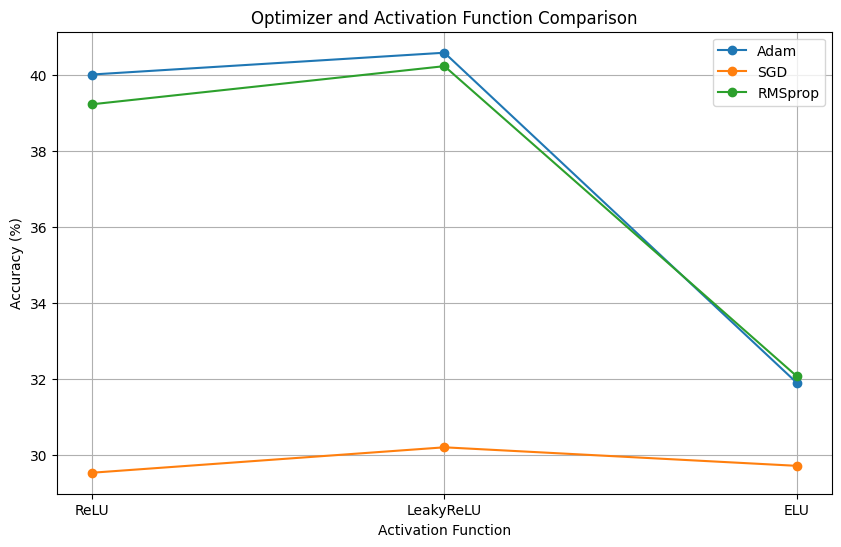

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model Tanımı
class CustomNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation_fn):
        super(CustomNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.layer1(x))
        x = self.activation_fn(self.layer2(x))
        x = self.layer3(x)
        return x

# Farklı optimizer ve aktivasyon fonksiyonları
optimizers = {
    "Adam": torch.optim.Adam,
    "SGD": torch.optim.SGD,
    "RMSprop": torch.optim.RMSprop
}

activations = {
    "ReLU": torch.relu,
    "LeakyReLU": torch.nn.functional.leaky_relu,
    "ELU": torch.nn.functional.elu
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for optimizer_name, optimizer_fn in optimizers.items():
    for activation_name, activation_fn in activations.items():
        fold_accuracies = []

        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            train_dataset = WineData(X_train, y_train)
            test_dataset = WineData(X_test, y_test)

            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

            # Modeli oluşturma
            model = CustomNet(X.shape[1], 128, len(np.unique(y)), activation_fn)
            model = model.float()

            # Optimizasyon ve kayıp fonksiyonu
            criterion = nn.CrossEntropyLoss()
            optimizer = optimizer_fn(model.parameters(), lr=0.001)

            # Eğitim
            NUM_EPOCHS = 50
            for epoch in range(NUM_EPOCHS):
                model.train()
                for X_batch, y_batch in train_loader:
                    X_batch = X_batch.float()
                    y_batch = y_batch.long()

                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # Test
            model.eval()
            correct = 0
            total = 0

            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    X_batch = X_batch.float()
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    total += y_batch.size(0)
                    correct += (predicted == y_batch).sum().item()

            accuracy = 100 * correct / total
            fold_accuracies.append(accuracy)

        # Ortalama doğruluğu hesapla
        avg_accuracy = np.mean(fold_accuracies)
        results.append((optimizer_name, activation_name, avg_accuracy))

# Sonuçları görselleştirme
results_df = pd.DataFrame(results, columns=["Optimizer", "Activation", "Accuracy"])
print(results_df)

plt.figure(figsize=(10, 6))
for optimizer_name in results_df["Optimizer"].unique():
    subset = results_df[results_df["Optimizer"] == optimizer_name]
    plt.plot(subset["Activation"], subset["Accuracy"], label=optimizer_name, marker="o")

plt.title("Optimizer and Activation Function Comparison")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

## Looping Complex Model

1.6712375446790602
1.6318706819197026
1.6233450185234954
1.6300207994333127
1.6248207212221333
1.626064378677345
1.6246190772550861
1.6223946064710617
1.6179605711524079
1.6268157395647793
1.620972421474573
1.6191927837889368
1.623984166398281
1.6189680775491202
1.6227287257589944
1.6194571296616298
1.6187721607161731
1.6252565191286366
1.6190628681967898
1.615752086406801
1.6188599092931282
1.6201037444719455
1.6171932703838117
1.616391692946597
1.616620412323533
1.614755317568779
1.619941623109143
1.6259341817803499
1.6237929285299488
1.6149953105827657
1.6161450812729394
1.610737987044381
1.6224372863042644
1.6195265356360413
1.6207147578640682
1.6083947561862992
1.6155128675263102
1.6149458877924012
1.621228203904338
1.6182674267670003
1.6178352051391833
1.6212511149848379
1.619061718990163
1.6141402092648716
1.6165544256204512
1.6208532401701299
1.6190096826815024
1.6220195013575438
1.6201981124354572
1.61225182871993
1.615765550151104
1.612732486390486
1.6119127738766554
1.612737

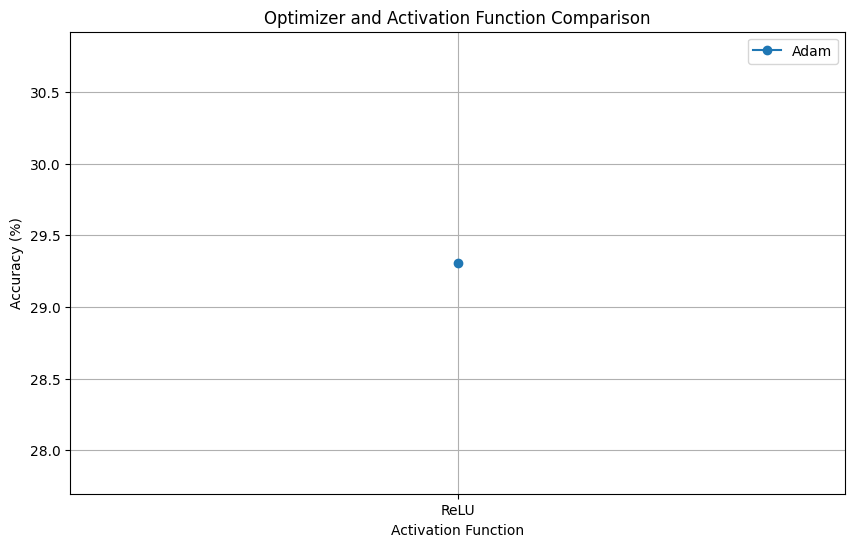

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz


for col in ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    df[col]=df[col]/df[col].max()


# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model Tanımı
class CustomNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.3):
        super(CustomNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer3 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.layer2(x)))
        x = self.layer3(x)
        return x

# Farklı optimizer ve aktivasyon fonksiyonları
optimizers = {
    "Adam": torch.optim.Adam,


}

activations = {
    "ReLU": torch.relu,


}

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# K-Fold Cross Validation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
results = []

for optimizer_name, optimizer_fn in optimizers.items():
    for activation_name, activation_fn in activations.items():
        fold_accuracies = []

        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            train_dataset = WineData(X_train, y_train)
            test_dataset = WineData(X_test, y_test)

            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

            # Modeli oluşturma
            model = CustomNet(X.shape[1], 128, len(np.unique(y)), dropout=0.3)
            model = model.float()

            # Optimizasyon ve kayıp fonksiyonu
            criterion = nn.CrossEntropyLoss()
            optimizer = optimizer_fn(model.parameters(), lr=0.1)

            # Eğitim
            NUM_EPOCHS = 100
            early_stopping = EarlyStopping(patience=20, min_delta=0.001)
            for epoch in range(NUM_EPOCHS):
                model.train()
                epoch_loss = 0.0

                for X_batch, y_batch in train_loader:
                    X_batch = X_batch.float()
                    y_batch = y_batch.long()

                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    epoch_loss += loss.item()

                avg_loss = epoch_loss / len(train_loader)
                print(avg_loss)

                # Erken durdurma kontrolü
                early_stopping(avg_loss)
                if early_stopping.early_stop:
                    break

            # Test
            model.eval()
            correct = 0
            total = 0

            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    X_batch = X_batch.float()
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    total += y_batch.size(0)
                    correct += (predicted == y_batch).sum().item()

            accuracy = 100 * correct / total
            fold_accuracies.append(accuracy)

        # Ortalama doğruluğu hesapla
        avg_accuracy = np.mean(fold_accuracies)
        results.append((optimizer_name, activation_name, avg_accuracy))

# Sonuçları görselleştirme
results_df = pd.DataFrame(results, columns=["Optimizer", "Activation", "Accuracy"])
print(results_df)

plt.figure(figsize=(10, 6))
for optimizer_name in results_df["Optimizer"].unique():
    subset = results_df[results_df["Optimizer"] == optimizer_name]
    plt.plot(subset["Activation"], subset["Accuracy"], label=optimizer_name, marker="o")

plt.title("Optimizer and Activation Function Comparison")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


  Optimizer Activation  Accuracy
0      Adam       ReLU    29.375


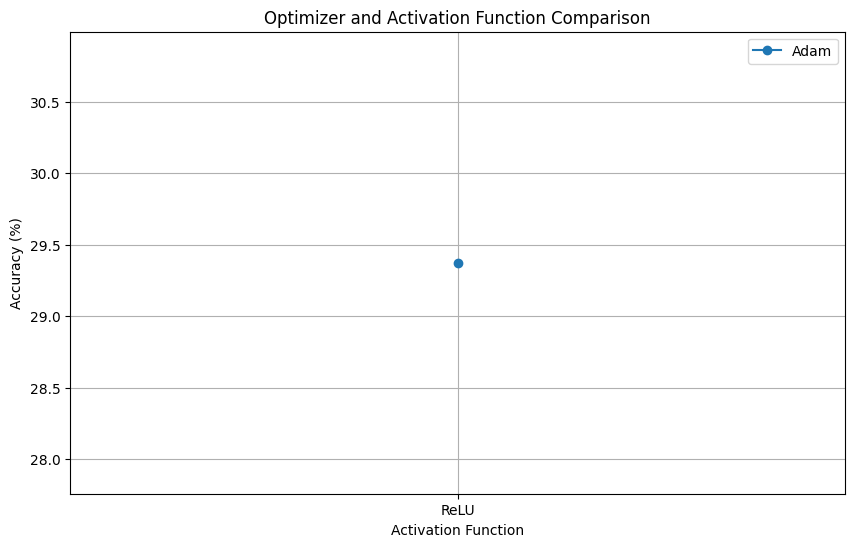

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Veriyi yükleme
url = "https://docs.google.com/spreadsheets/d/1MfCpqnAqJUJxBeykmUy0gfoz7d0PH0M3ZlpIa-H_Iys/export?format=csv"
df = pd.read_csv(url)

# Eksik değerlerin temizlenmesi
df["alcohol"] = pd.to_numeric(df["alcohol"], errors='coerce')  # Sayısal veri formatına çevirme
df = df.dropna()  # Tüm eksik verileri kaldırıyoruz

# Özellik normalizasyonu
for col in ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'pH', 'sulphates', 'alcohol']:
    df[col] = df[col] / df[col].max()

# X ve y ayrımı
X = df.drop(["quality"], axis=1)
y = df["quality"]

# Sınıf etiketlerini 0'dan başlatmak için (örneğin, sınıflar 1, 2, 3 gibi ise)
y = y - y.min()

# X'in normalizasyonu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X ve y'nin numpy dizilerine dönüştürülmesi
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# PyTorch Dataset Sınıfı
class WineData(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model Tanımı
class CustomNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.3):
        super(CustomNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer3 = nn.Linear(hidden_dim // 2, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.layer1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.layer2(x)))
        x = self.layer3(x)
        return x

# Farklı optimizer ve aktivasyon fonksiyonları
optimizers = {
    "Adam": torch.optim.Adam,

}

activations = {
    "ReLU": torch.relu,

}

# Erken Durdurma Sınıfı
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for optimizer_name, optimizer_fn in optimizers.items():
    for activation_name, activation_fn in activations.items():
        fold_accuracies = []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            train_dataset = WineData(X_train, y_train)
            test_dataset = WineData(X_test, y_test)

            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

            # Modeli oluşturma
            model = CustomNet(X.shape[1], 128, len(np.unique(y)), dropout=0.3)
            model = model.float()

            # Optimizasyon ve kayıp fonksiyonu
            criterion = nn.CrossEntropyLoss()
            optimizer = optimizer_fn(model.parameters(), lr=0.1)
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

            # Eğitim
            NUM_EPOCHS = 20
            early_stopping = EarlyStopping(patience=20, min_delta=0.001)
            for epoch in range(NUM_EPOCHS):
                model.train()
                epoch_loss = 0.0

                for X_batch, y_batch in train_loader:
                    X_batch = X_batch.float()
                    y_batch = y_batch.long()

                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    epoch_loss += loss.item()

                avg_loss = epoch_loss / len(train_loader)
                scheduler.step(avg_loss)

                # Erken durdurma kontrolü
                early_stopping(avg_loss)
                if early_stopping.early_stop:
                    break

            # Test
            model.eval()
            correct = 0
            total = 0

            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    X_batch = X_batch.float()
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    total += y_batch.size(0)
                    correct += (predicted == y_batch).sum().item()

            accuracy = 100 * correct / total
            fold_accuracies.append(accuracy)

        # Ortalama doğruluğu hesapla
        avg_accuracy = np.mean(fold_accuracies)
        results.append((optimizer_name, activation_name, avg_accuracy))

# Sonuçları görselleştirme
results_df = pd.DataFrame(results, columns=["Optimizer", "Activation", "Accuracy"])
print(results_df)

plt.figure(figsize=(10, 6))
for optimizer_name in results_df["Optimizer"].unique():
    subset = results_df[results_df["Optimizer"] == optimizer_name]
    plt.plot(subset["Activation"], subset["Accuracy"], label=optimizer_name, marker="o")

plt.title("Optimizer and Activation Function Comparison")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()